In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')  # enable import from src/

In [2]:
import pickle

from src.net import InstanceGCN
from src.utils import load_from_wandb

with open('../study3.pkl', 'rb') as f:
    study = pickle.load(f)

study

dict_keys(['conv1', 'conv2', 'SAGE_aggregator_type', 'SAGE_feat_drop', 'conv3', 'n_h_feats', 'single_conv_for_both_passes', 'n_passes', 'batch_power', 'samples_per_problem_power'])

In [10]:
from optuna.importance import get_param_importances, MeanDecreaseImpurityImportanceEvaluator

importance = get_param_importances(study, params=list(study.best_params.keys()), evaluator=MeanDecreaseImpurityImportanceEvaluator())
importance

OrderedDict([('conv2', 0.3992689965056223),
             ('single_conv_for_both_passes', 0.27984501395544525),
             ('SAGE_aggregator_type', 0.09914826183841048),
             ('batch_power', 0.07548648417484313),
             ('samples_per_problem_power', 0.050169864600058234),
             ('n_h_feats', 0.03680490510277436),
             ('conv1', 0.02741331825115884),
             ('conv3', 0.01466914913311498),
             ('SAGE_feat_drop', 0.011089362311947034),
             ('n_passes', 0.006104644126625173)])

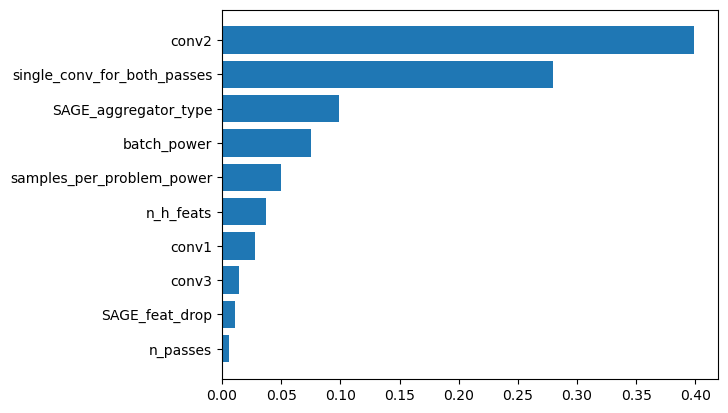

In [19]:
import matplotlib.pyplot as plt

hps = list(importance.keys())
vs = list(importance.values())
hps = hps[::-1]
vs = vs[::-1]
plt.barh(range(len(hps)), vs, tick_label=hps)
plt.show()

In [3]:
df = study.trials_dataframe()
df

,number,value,datetime_start,datetime_complete,duration,params_SAGE_aggregator_type,params_SAGE_feat_drop,params_batch_power,params_conv1,params_conv2,params_conv3,params_n_h_feats,params_n_passes,params_samples_per_problem_power,params_single_conv_for_both_passes,user_attrs_wandb_id,state
0,0,-0.501405,2023-02-28 19:08:56.949504,2023-02-28 19:13:11.180673,0 days 00:04:14.231169,NaN,NaN,7,GraphConv,GraphConv,GraphConv,3,2,7,False,qof0k934,COMPLETE
1,1,-0.730518,2023-02-28 19:13:11.181271,2023-02-28 21:18:45.254314,0 days 02:05:34.073043,lstm,0.346287,4,SAGEConv,SAGEConv,None,19,2,6,False,64k1gbkp,COMPLETE
2,2,-0.731336,2023-02-28 21:18:45.255068,2023-02-28 21:56:42.915831,0 days 00:37:57.660763,NaN,NaN,2,GraphConv,GraphConv,GraphConv,11,2,9,False,dsokmiev,COMPLETE
3,3,-0.554607,2023-02-28 21:56:42.916618,2023-02-28 21:58:19.864102,0 days 00:01:36.947484,NaN,NaN,6,GraphConv,GraphConv,None,4,1,6,True,yh8g4gxc,COMPLETE
4,4,-0.749141,2023-02-28 21:58:19.864964,2023-02-28 22:07:25.358250,0 days 00:09:05.493286,pool,0.248353,2,SAGEConv,SAGEConv,None,13,2,7,True,cl6wbzbd,COMPLETE
5,5,-0.519052,2023-02-28 22:07:25.359084,2023-02-28 22:19:51.331823,0 days 00:12:25.972739,pool,0.406349,6,SAGEConv,None,None,16,1,9,False,cy9l3wbx,COMPLETE
6,6,-0.500013,2023-02-28 22:19:51.334488,2023-02-28 22:23:45.049165,0 days 00:03:53.714677,pool,0.406281,4,GraphConv,None,SAGEConv,20,2,6,True,i8nnqu1e,COMPLETE
7,7,-0.656207,2023-02-28 22:23:45.050001,2023-02-28 22:27:37.844437,0 days 00:03:52.794436,pool,0.214799,7,SAGEConv,SAGEConv,GraphConv,13,1,7,True,9txhiiat,COMPLETE
8,8,-0.789749,2023-02-28 22:27:37.845409,2023-02-28 22:52:56.093719,0 days 00:25:18.248310,pool,0.090883,2,GraphConv,SAGEConv,GraphConv,19,1,9,False,4qwwaeyy,COMPLETE
9,9,-0.729719,2023-02-28 22:52:56.094621,2023-02-28 23:25:39.632961,0 days 00:32:43.538340,gcn,0.311523,3,GraphConv,GraphConv,SAGEConv,20,2,9,False,6r843ek4,COMPLETE


In [5]:
for trial in study.trials:
    if trial.user_attrs['wandb_id'] == '6lhx25wd':
        break
trial

FrozenTrial(number=17, state=TrialState.COMPLETE, values=[-0.786963394007732], datetime_start=datetime.datetime(2023, 3, 1, 8, 35, 49, 826131), datetime_complete=datetime.datetime(2023, 3, 1, 9, 12, 23, 204464), params={'conv1': 'GraphConv', 'conv2': 'SAGEConv', 'SAGE_aggregator_type': 'pool', 'SAGE_feat_drop': 0.09680050396432788, 'conv3': 'GraphConv', 'n_h_feats': 17, 'single_conv_for_both_passes': False, 'n_passes': 1, 'batch_power': 4, 'samples_per_problem_power': 10}, user_attrs={'wandb_id': '6lhx25wd'}, system_attrs={}, intermediate_values={}, distributions={'conv1': CategoricalDistribution(choices=('GraphConv', 'SAGEConv')), 'conv2': CategoricalDistribution(choices=(None, 'GraphConv', 'SAGEConv')), 'SAGE_aggregator_type': CategoricalDistribution(choices=('pool', 'gcn', 'lstm')), 'SAGE_feat_drop': FloatDistribution(high=0.5, log=False, low=0.0, step=None), 'conv3': CategoricalDistribution(choices=(None, 'GraphConv', 'SAGEConv')), 'n_h_feats': IntDistribution(high=20, log=False, l

In [6]:
trial.params

{'conv1': 'GraphConv',
 'conv2': 'SAGEConv',
 'SAGE_aggregator_type': 'pool',
 'SAGE_feat_drop': 0.09680050396432788,
 'conv3': 'GraphConv',
 'n_h_feats': 17,
 'single_conv_for_both_passes': False,
 'n_passes': 1,
 'batch_power': 4,
 'samples_per_problem_power': 10}

In [5]:
study.best_trial.user_attrs

{'wandb_id': '4qwwaeyy'}

In [6]:
study.best_params

{'conv1': 'GraphConv',
 'conv2': 'SAGEConv',
 'SAGE_aggregator_type': 'pool',
 'SAGE_feat_drop': 0.09088315812338871,
 'conv3': 'GraphConv',
 'n_h_feats': 19,
 'single_conv_for_both_passes': False,
 'n_passes': 1,
 'batch_power': 2,
 'samples_per_problem_power': 9}

In [7]:
net = InstanceGCN(
    2,
    n_passes=1,
    single_conv_for_both_passes=False,
    n_h_feats=19,
    conv1='GraphConv',
    conv2='SAGEConv',
    conv2_kwargs={
        'aggregator_type': 'pool',
        'feat_drop': .09088,
    },
    conv3='GraphConv',
    readout_op=None,
)
net = load_from_wandb(net, 'dva750fx', 'sat-gnn', 'model_best')

In [9]:
from pathlib import Path

instances_fpaths = list(Path('../data/raw/').glob('97_9*.jl'))[-2:]
# instances_fpaths = sorted(instances_fpaths)
instances_fpaths

[PosixPath('../data/raw/97_9_18.jl'), PosixPath('../data/raw/97_9_19.jl')]